In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = 'TRUE'

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from dc_gan import Discriminator, Generator, init_weights

c:\Users\Akshay Badagabettu\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
from s4_gan_architecture import S4Gen

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

#hyper-parameters
learning_rate = 2e-4
BATCH_SIZE = 128
IMAGE_SIZE = 64
CHANNELS_IMG = 1
NOISE_DIM = 100
NUM_EPOCHS = 5
FEATURES_DISC = 64
FEATURES_GEN = 64

transform = transforms.Compose([
        transforms.Resize(IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.view(1, 4096).t())
    ])

# If you train on MNIST, remember to set channels_img to 1
dataset = datasets.MNIST(root="dataset/", train=True, transform=transform, download=True)

cuda


In [5]:
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
gen = S4Gen(
    d_input=100,
    d_output=64*64,
    d_model=256,
    n_layers=4,
    dropout=0.2,
    prenorm=False,
).to(device)
disc = Discriminator(CHANNELS_IMG, FEATURES_DISC).to(device)
init_weights(gen)
init_weights(disc)
opt_gen = optim.Adam(gen.parameters(), lr=learning_rate, betas=(0.5, 0.999))
opt_disc = optim.Adam(disc.parameters(), lr=learning_rate, betas=(0.5, 0.999))
criterion = nn.BCELoss()
fixed_noise = torch.randn(32, NOISE_DIM, 1, 1).to(device)

gen.train()
disc.train()

Discriminator(
  (discriminator): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (3): Sequential(
      (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (4): Conv2d(512, 1, kernel_size=(4, 4), stride=(2, 2))
    (5): Sigmoid()
  )
)

In [6]:
def save_and_display_images(images_tensor, epoch, batch_idx, num_images=8):
    grid = vutils.make_grid(images_tensor[:num_images], nrow=4, padding=2, normalize=True)
    plt.figure(figsize=(8, 8))
    plt.imshow(grid.permute(1, 2, 0).cpu().detach().numpy())
    plt.axis('off')
    plt.title(f'Generated Images - Epoch {epoch}, Batch {batch_idx}')
    plt.show()  

In [7]:
'''def calculate_inception_score(generator, num_samples, batch_size, device):
    all_preds = []
    for _ in range(num_samples // batch_size):
        noise = torch.randn(batch_size, NOISE_DIM, 1, 1).to(device)
        fake = generator(noise)
        all_preds.append(fake)

    all_preds = torch.cat(all_preds, dim=0)
    preds = torch.softmax(inception_model(all_preds), dim=1)
    scores = []
    for i in range(preds.size(0)):
        kl_div = preds[i] * (torch.log(preds[i]) - torch.log(torch.mean(preds, dim=0)))
        kl_div = kl_div.sum()
        scores.append(torch.exp(kl_div.item()))

    return np.mean(scores), np.std(scores)'''

'def calculate_inception_score(generator, num_samples, batch_size, device):\n    all_preds = []\n    for _ in range(num_samples // batch_size):\n        noise = torch.randn(batch_size, NOISE_DIM, 1, 1).to(device)\n        fake = generator(noise)\n        all_preds.append(fake)\n\n    all_preds = torch.cat(all_preds, dim=0)\n    preds = torch.softmax(inception_model(all_preds), dim=1)\n    scores = []\n    for i in range(preds.size(0)):\n        kl_div = preds[i] * (torch.log(preds[i]) - torch.log(torch.mean(preds, dim=0)))\n        kl_div = kl_div.sum()\n        scores.append(torch.exp(kl_div.item()))\n\n    return np.mean(scores), np.std(scores)'

torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
Epoch [0/5] Batch 0/469                   Loss D: 0.6942, loss G: 0.7213


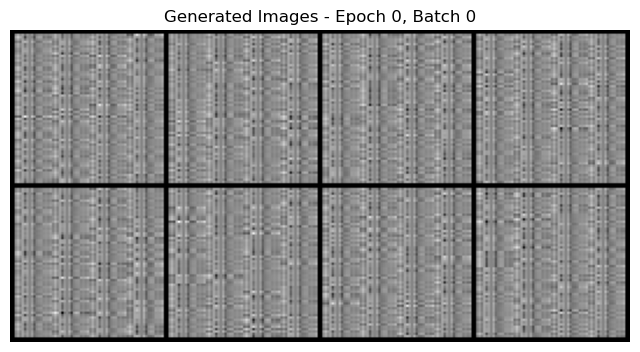

torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([12

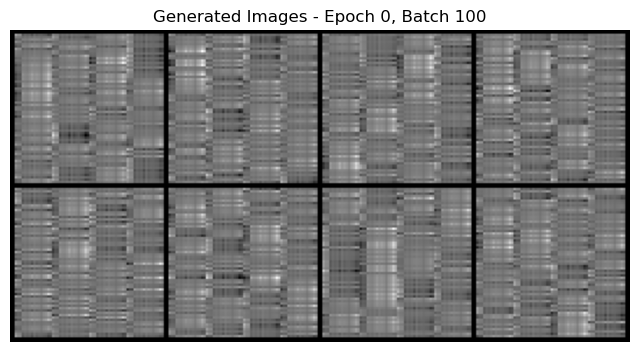

torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([12

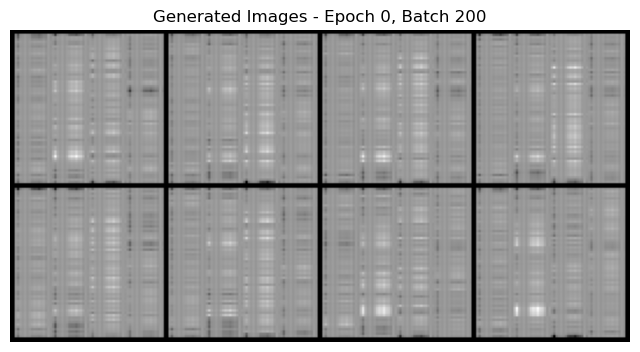

torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([12

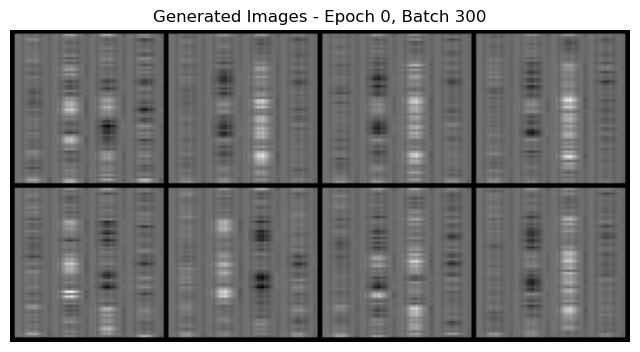

torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([12

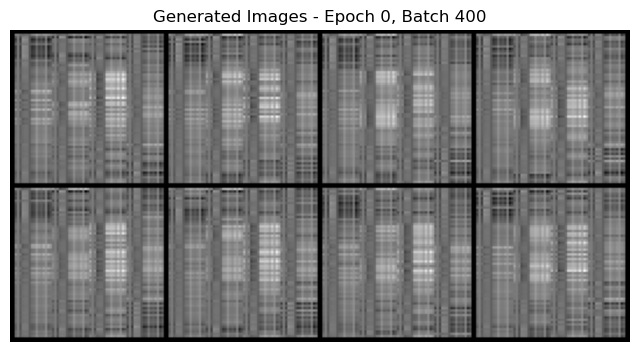

torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([128, 1, 64, 64])
torch.Size([12

KeyboardInterrupt: 

In [8]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import math

generator_loss = []
discriminator_loss = []
inception_scores_mean = []
inception_scores_std = []

for epoch in range(NUM_EPOCHS):
    disc_loss = 0
    gen_loss = 0
    for batch_idx, (real, _) in enumerate(dataloader):
        real = real.to(device)
        noise = torch.randn(BATCH_SIZE, 1, NOISE_DIM).to(device)
        fake = gen(noise)
        real = real.reshape(real.shape[0], real.shape[2], int(math.sqrt(real.shape[1])), int(math.sqrt(real.shape[1])))

        disc_real = disc(real).reshape(-1)
        loss_disc_real = criterion(disc_real, torch.ones_like(disc_real))       
        disc_fake = disc(fake.detach()).reshape(-1)
        loss_disc_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        
        loss_disc = (loss_disc_real + loss_disc_fake) / 2
        disc_loss += loss_disc.item()
        
        disc.zero_grad()
        loss_disc.backward()
        opt_disc.step()

        output = disc(fake).reshape(-1)
        loss_gen = criterion(output, torch.ones_like(output))
        gen_loss += loss_gen.item()
        gen.zero_grad()
        loss_gen.backward()
        opt_gen.step()
        
        if batch_idx % 100 == 0:
            print(
                f"Epoch [{epoch}/{NUM_EPOCHS}] Batch {batch_idx}/{len(dataloader)} \
                  Loss D: {loss_disc:.4f}, loss G: {loss_gen:.4f}"
            )

        if batch_idx % 100 == 0:
            save_and_display_images(fake, epoch, batch_idx)

    generator_loss.append(gen_loss / len(dataloader))
    discriminator_loss.append(disc_loss / len(dataloader))

    """is_mean, is_std = calculate_inception_score(gen, num_samples=50000, batch_size=BATCH_SIZE, device=device)
    inception_scores_mean.append(is_mean)
    inception_scores_std.append(is_std)"""

In [7]:
#saving the model weights
torch.save(gen.state_dict(), 'generator_weights_dc_gan.pth')

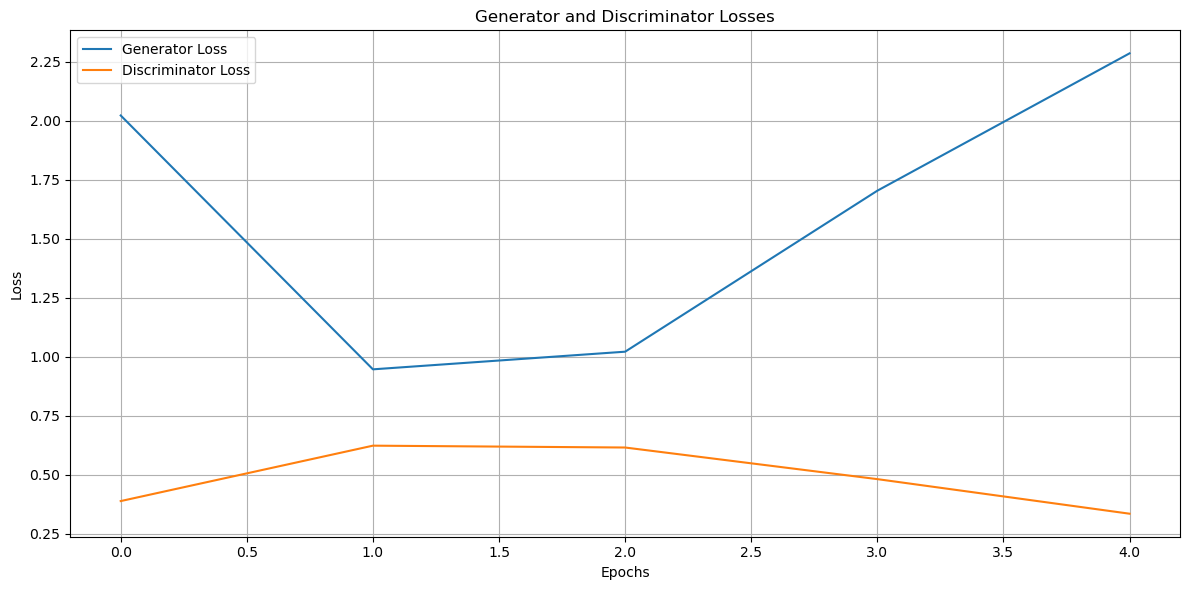

In [8]:
#plotting the generator loss and the discriminator loss
plt.figure(figsize=(12, 6))
plt.plot(generator_loss, label='Generator Loss')
plt.plot(discriminator_loss, label='Discriminator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Generator and Discriminator Losses')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()